This notebook parses sgf files generated by the `match` command,
and loads them into a Pandas dataframe.

### Load libraries

In [1]:
import dataclasses
import os
import random
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
from sgf_parser import game_info

### Load data

In [2]:
# MATCH_DIR = "../tests/testdata/visits-truncated/"
MATCH_DIR =  "/nas/ucb/tony/go-attack/matches/cp505-perfect-victim-modeling"

sgf_paths = game_info.find_sgf_files(MATCH_DIR)
len(sgf_paths)

1600

In [3]:
game_infos = game_info.read_and_parse_all_files(
    sgf_paths,
    fast_parse=True,
)

In [4]:
%%time
df = pd.DataFrame(game_infos)
print("gtypes:", df.gtype.unique())
print("Number of cleanup games:", (df.gtype == "cleanuptraining").sum())

# Filter to only normal games
df = df[(df.gtype == "normal")]
print("Fraction continuation:    ", df.is_continuation.mean())
print("Fraction used_initial_pos:", df.used_initial_position.mean())
print("max(init_turn_num)       :", df.init_turn_num.max())

df.head()

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0
CPU times: user 9.41 ms, sys: 5.01 ms, total: 14.4 ms
Wall time: 12.9 ms


,b_name,w_name,victim_color,victim_name,victim_visits,victim_steps,victim_rsym,victim_algo,adv_color,adv_name,...,sui_legal,has_button,whb,fpok,init_turn_num,used_initial_position,gtype,is_continuation,sgf_path,sgf_line
0,adv-s34090496-v200,cp505-v1,w,cp505-v1,1,0,4,MCTS,b,adv-s34090496-v200,...,True,False,0,False,0,False,normal,False,/nas/ucb/tony/go-attack/matches/cp505-perfect-...,1
1,adv-s34090496-v200,cp505-v16,w,cp505-v16,16,0,4,MCTS,b,adv-s34090496-v200,...,True,False,0,False,0,False,normal,False,/nas/ucb/tony/go-attack/matches/cp505-perfect-...,1
2,adv-s34090496-v200,cp505-v4,w,cp505-v4,4,0,4,MCTS,b,adv-s34090496-v200,...,True,False,0,False,0,False,normal,False,/nas/ucb/tony/go-attack/matches/cp505-perfect-...,1
3,adv-s34090496-v200,cp505-v64,w,cp505-v64,64,0,4,MCTS,b,adv-s34090496-v200,...,True,False,0,False,0,False,normal,False,/nas/ucb/tony/go-attack/matches/cp505-perfect-...,1
4,cp505-v4,adv-s34090496-v200,b,cp505-v4,4,0,4,MCTS,w,adv-s34090496-v200,...,True,False,0,False,0,False,normal,False,/nas/ucb/tony/go-attack/matches/cp505-perfect-...,1


### Helper functions

In [5]:
@dataclasses.dataclass
class SGFUrl:
    sgf: str
    text: str

    def sgf_str_to_url(self, sgf_str: str) -> str:
        return f"https://humancompatibleai.github.io/sgf-viewer/#sgf={sgf_str}"

    def __post_init__(self):
        self.url = self.sgf_str_to_url(self.sgf)

    def _repr_html_(self):
        """HTML link to this URL."""
        return f'<a href="{self.url}">{self.text}</a>'

    def __str__(self):
        """Return the underlying string."""
        return self.url

### Analyze data

<AxesSubplot: >

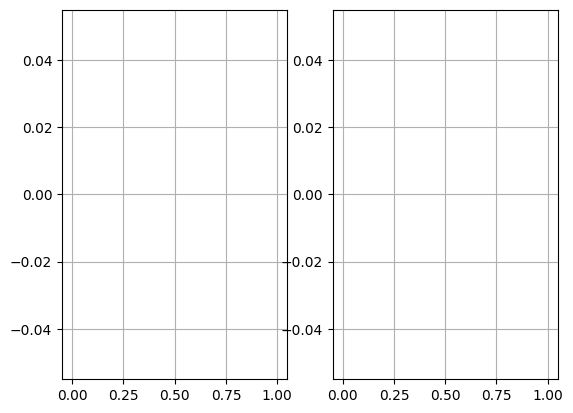

In [6]:
plt.subplot(1, 2, 1)
df[(df.b_name == "cp127-v1") & (df.w_name == "cp63-v1024")].win_color.hist()

plt.subplot(1, 2, 2)
df[(df.w_name == "cp127-v1") & (df.b_name == "cp63-v1024")].win_color.hist()

In [7]:
cur_df = df[(df.win_name == "cp63-v1024") & (df.lose_name == "cp127-v1")]
len(cur_df)

0

In [8]:
if len(cur_df.index) > 0:
    game_to_view_path = cur_df.iloc[0]["sgf_path"]
    game_to_view_line = cur_df.iloc[0]["sgf_line"]
    game_to_view_str = ""
    with open(game_to_view_path, "r") as f:
        for i, line in enumerate(f):
            if i + 1 == game_to_view_line:
                game_to_view_str = line
                break
    SGFUrl(sgf=game_to_view_str, text="cp63-v1024 beats cp127-v1 (game2)")
else:
    print('cur_df is empty')

cur_df is empty
